In [12]:
import librosa
import librosa.display
import matplotlib.pyplot as plt


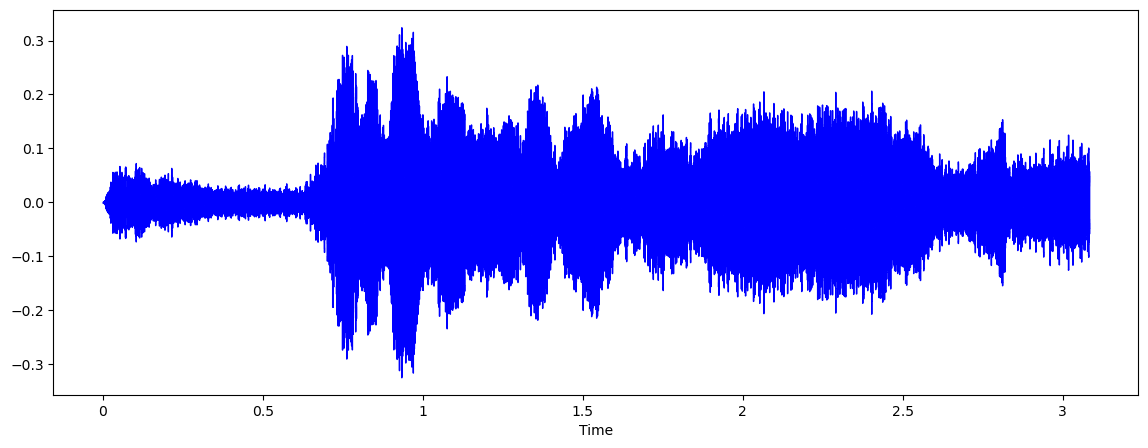

In [15]:
AUDIO_FILE = './cat_data/Angry/car_extcoll0103_aug1(1).mp3'
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(samples, sr=sample_rate, color="blue")

In [17]:
from IPython.display import Audio
Audio('./cat_data/Angry/car_extcoll0103_aug1(1).mp3')